In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks, optimizers, metrics, Sequential


In [3]:
df = pd.read_csv('data/ranked_10min.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


<Axes: >

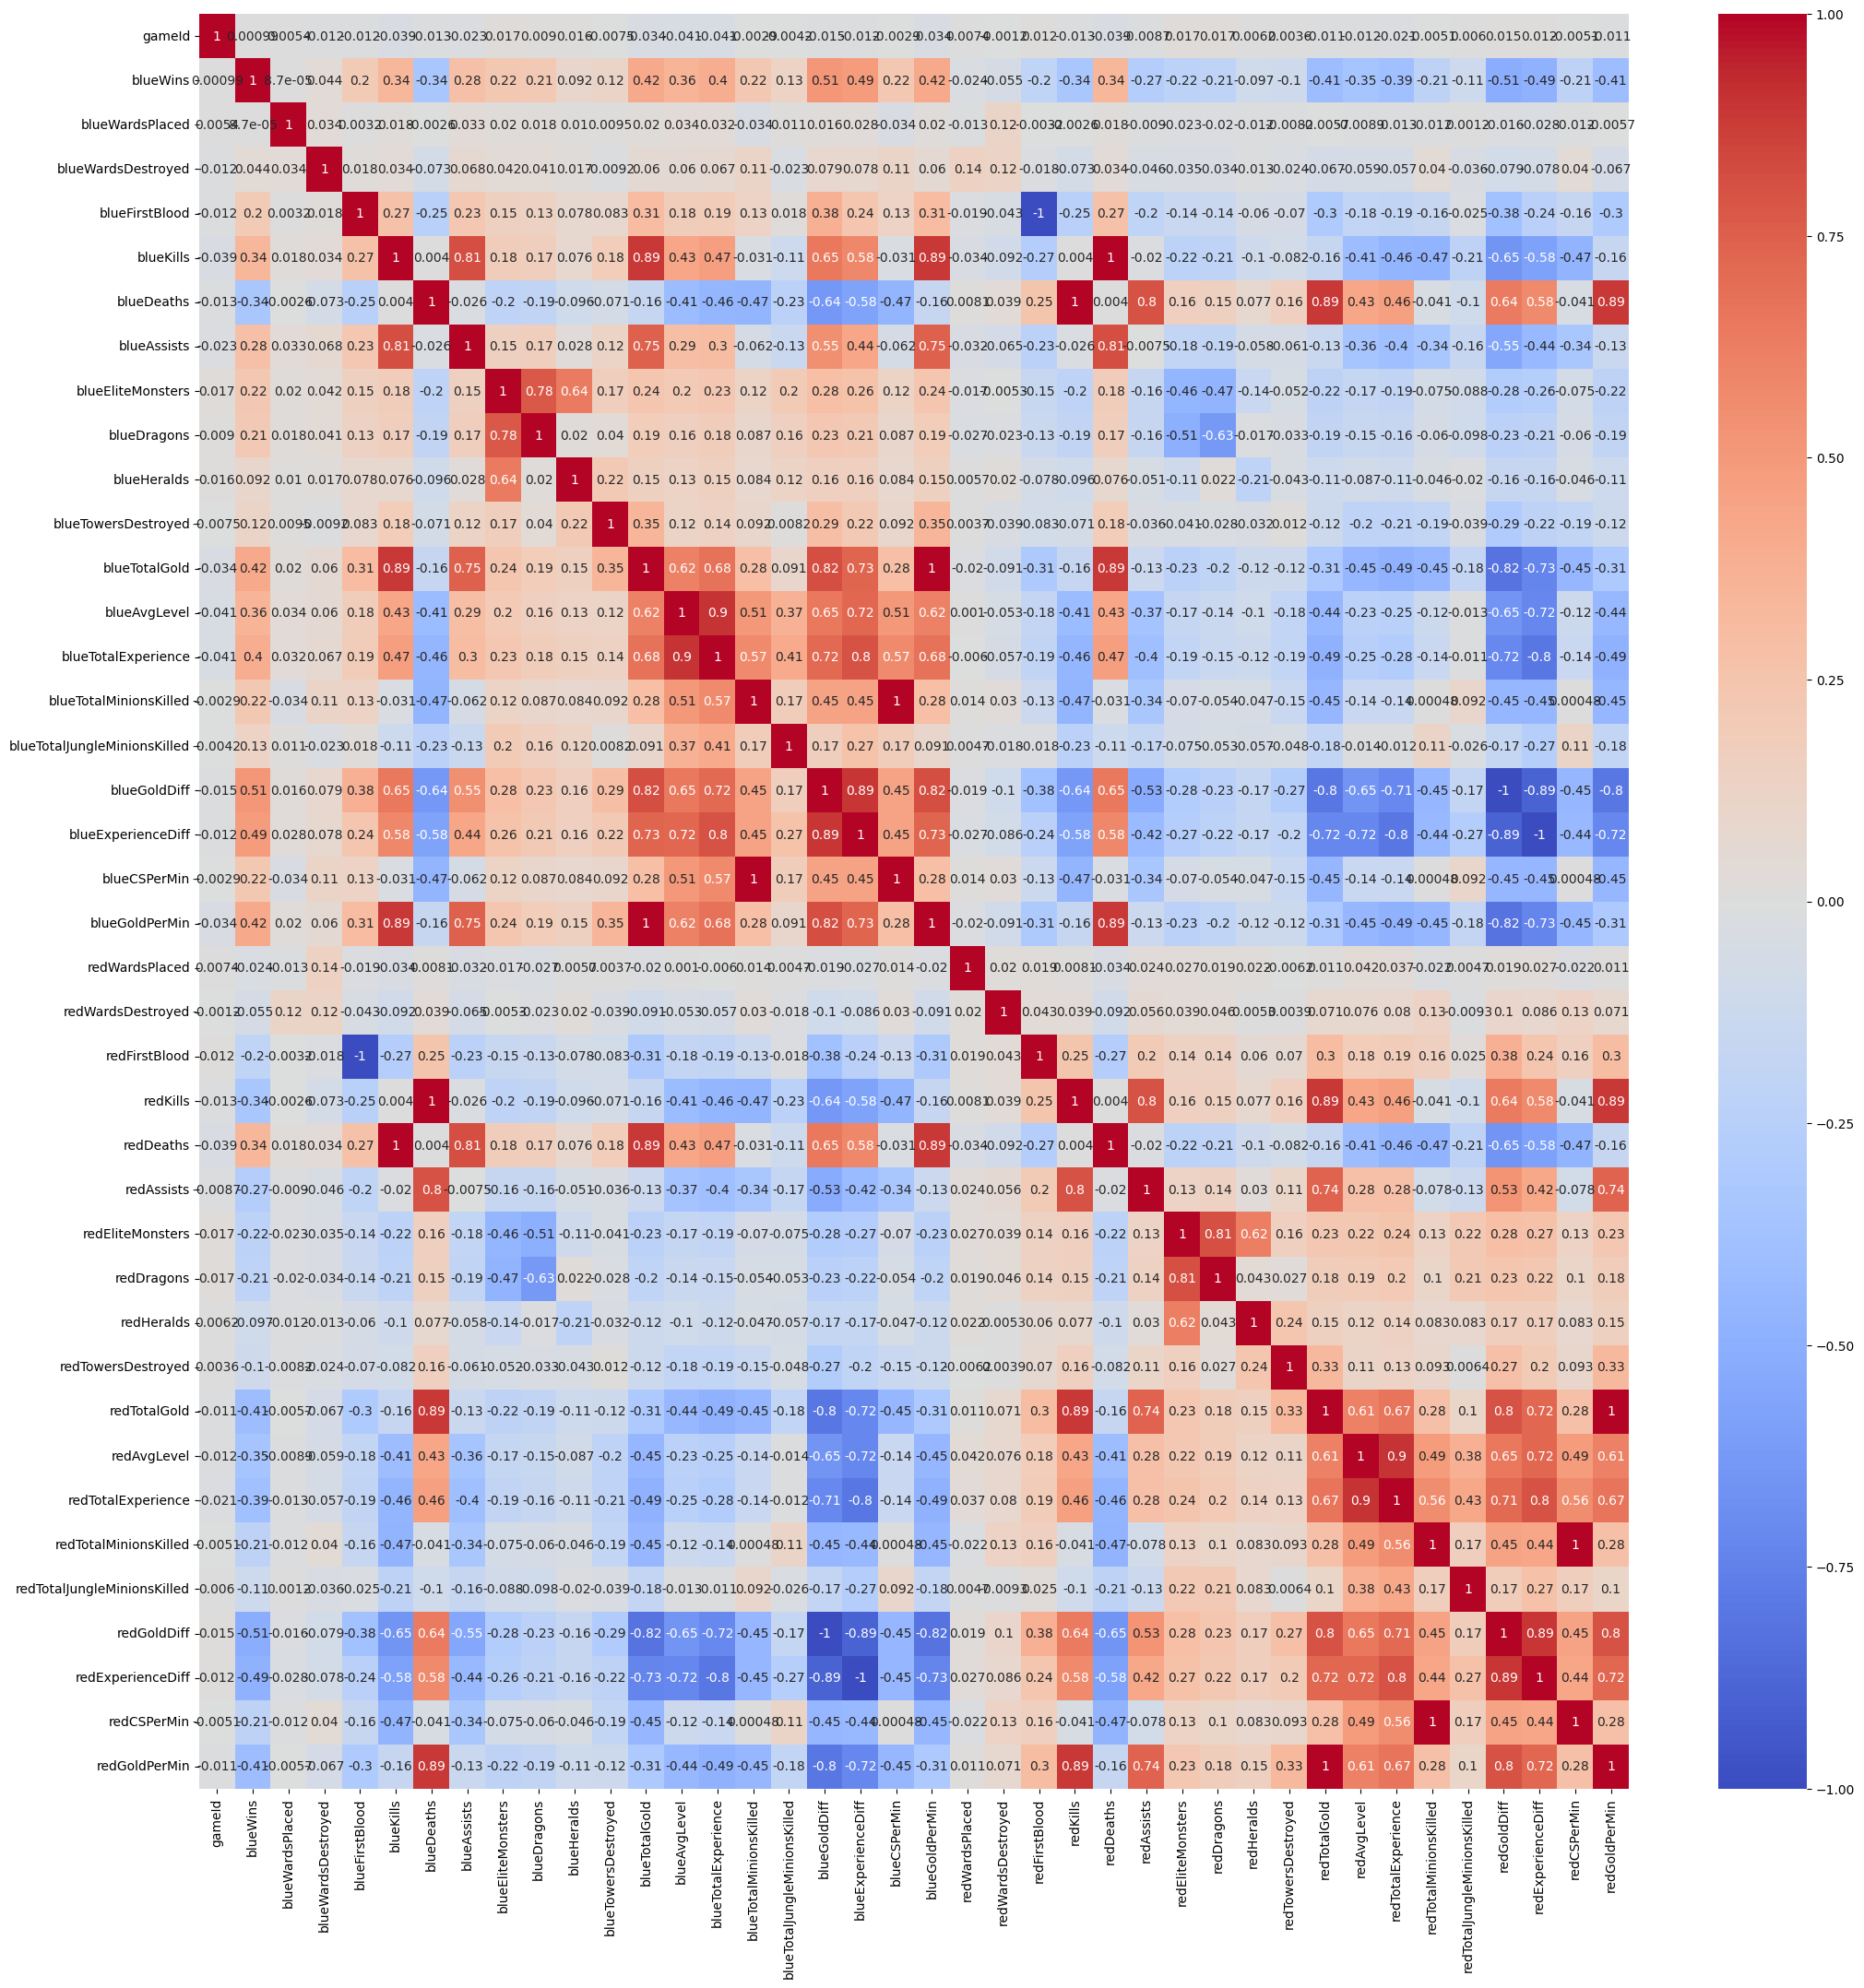

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')

In [9]:
df = df.drop(columns=['blueTotalExperience','redTotalExperience','blueGoldDiff','redGoldDiff','blueExperienceDiff','blueCSPerMin','redCSPerMin','blueEliteMonsters','redEliteMonsters','blueDeaths','redDeaths','blueFirstBlood','blueTotalJungleMinionsKilled','redTotalJungleMinionsKilled','redExperienceDiff','redWardsDestroyed','blueWardsDestroyed','gameId','blueGoldPerMin','redGoldPerMin'])

<Axes: >

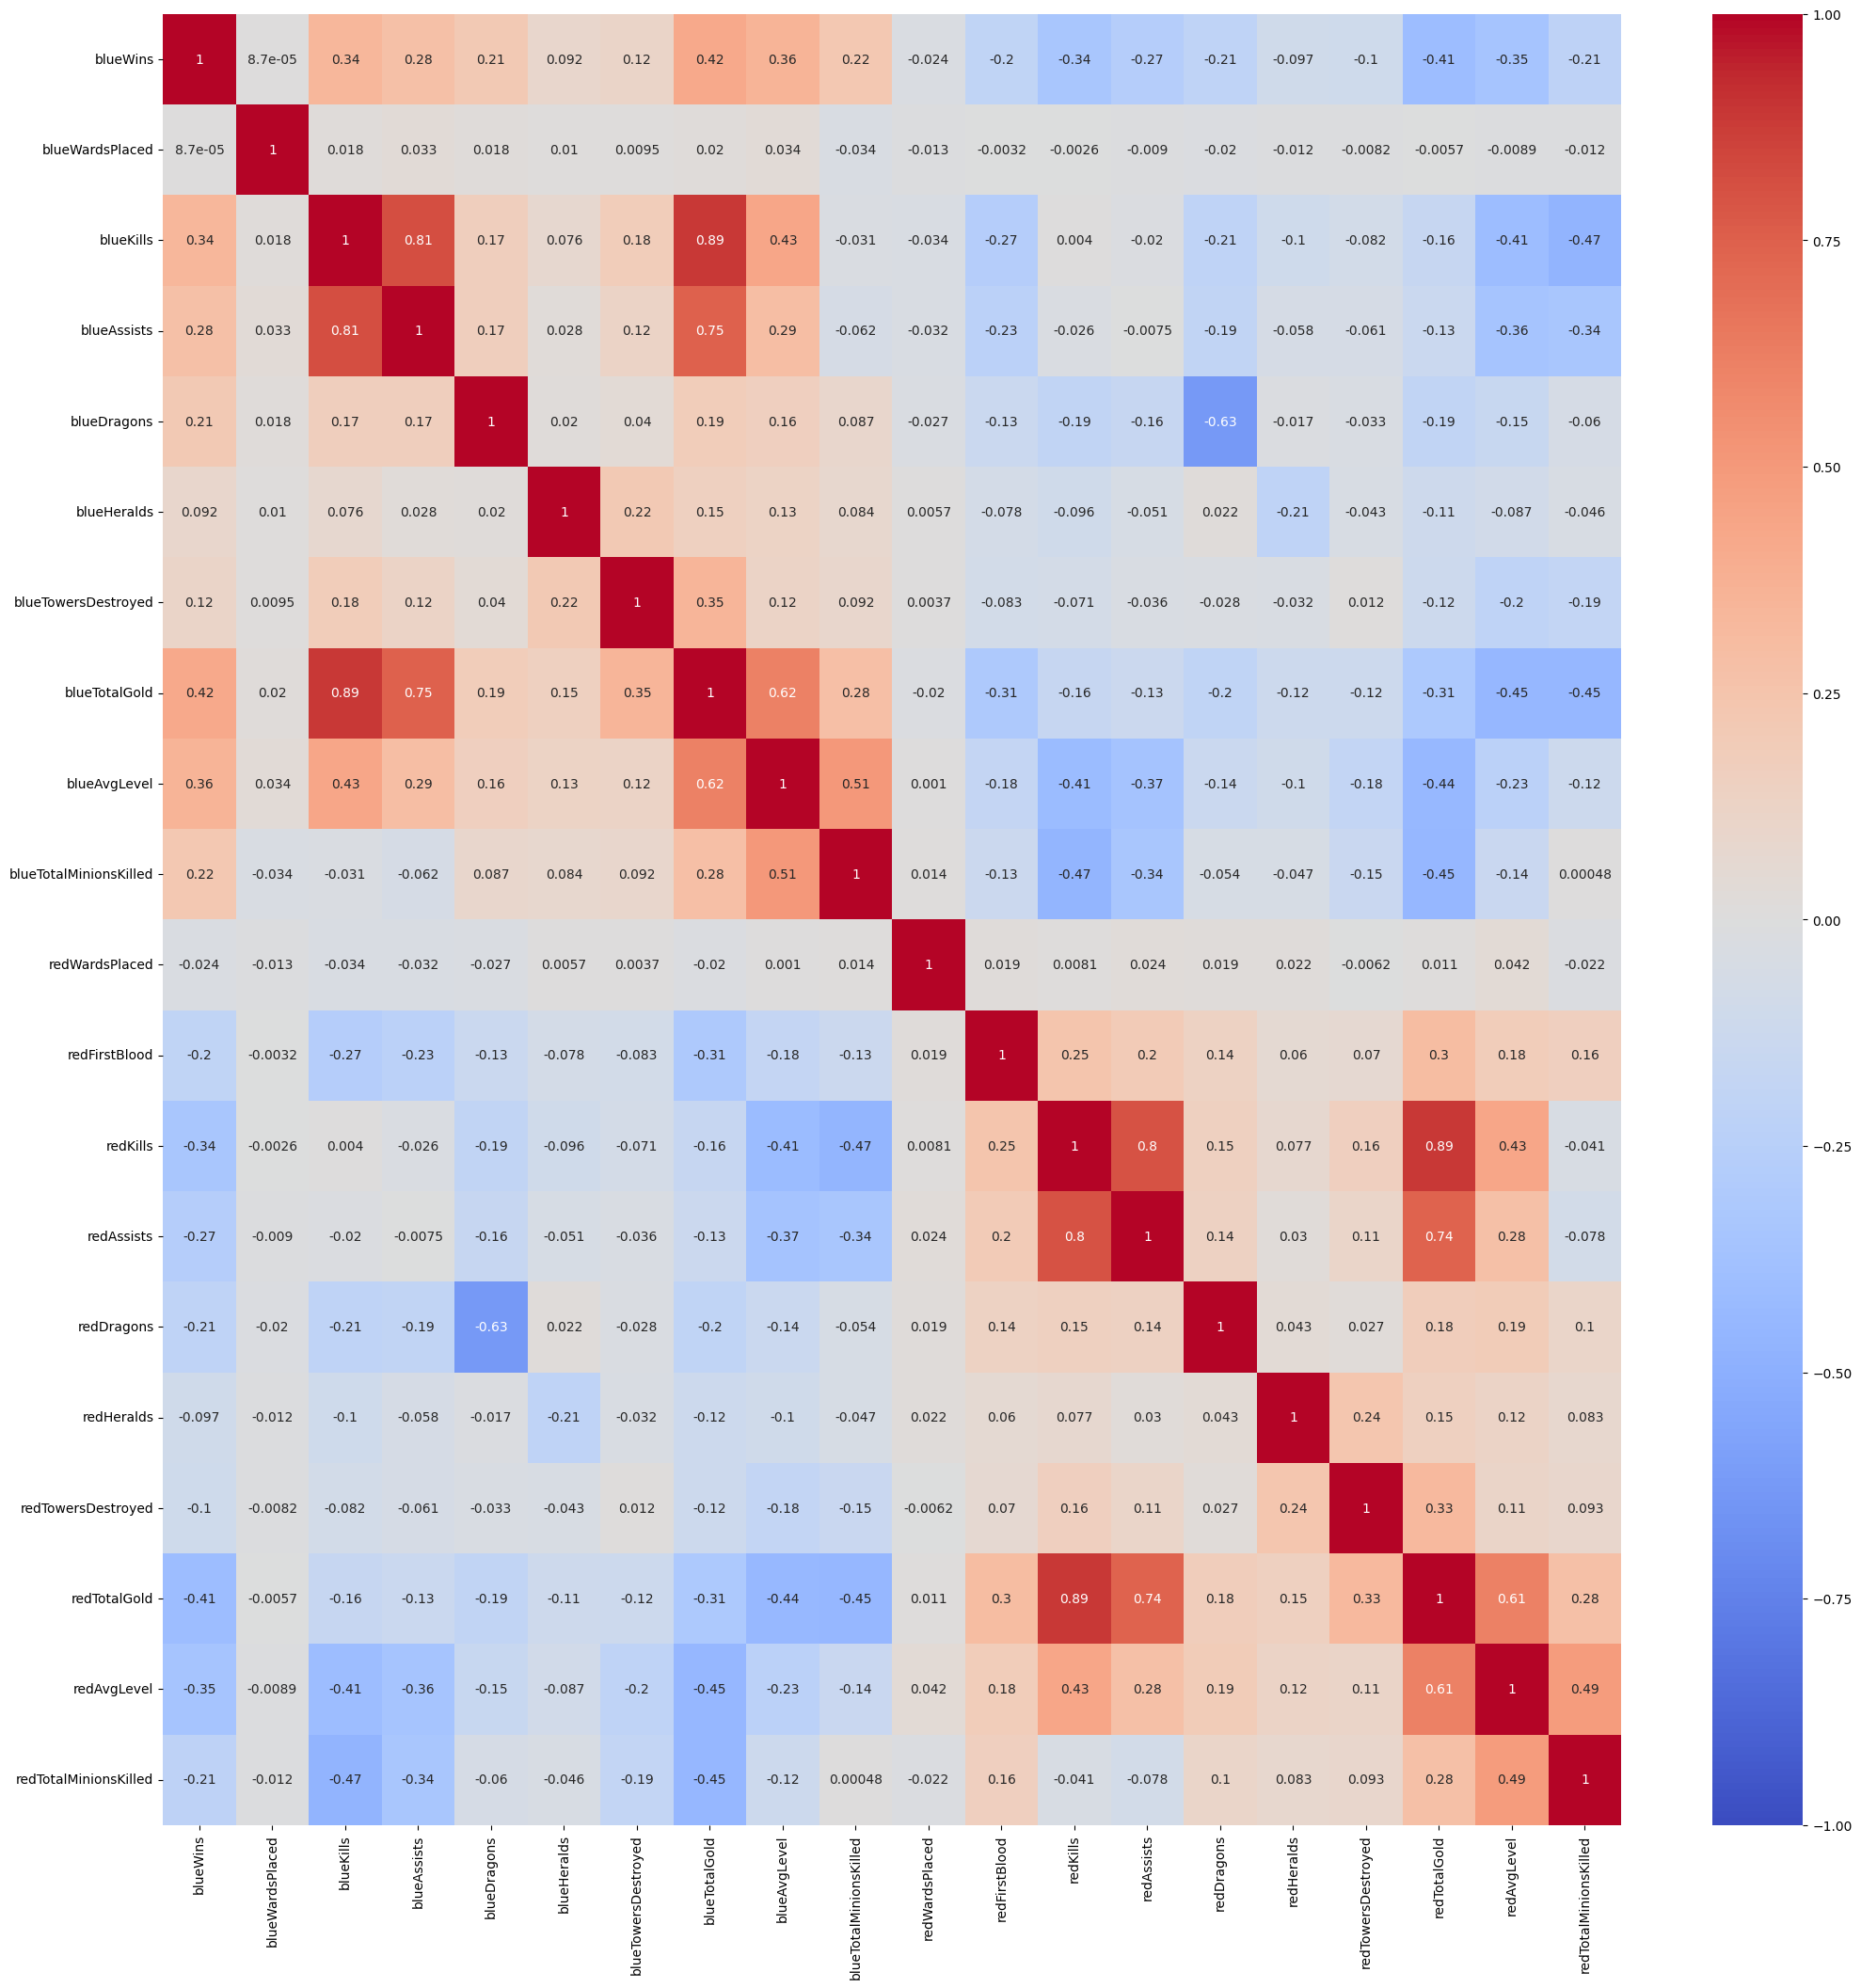

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')

In [11]:
df['blueWins'] = df['blueWins'].replace({0: 1, 1: 0})


In [12]:
df = df.rename(columns={'blueWins':'EquipoGanador'})

In [14]:
df["kills_diff"] = df["blueKills"] - df["redKills"]
df["assists_diff"] = df["blueAssists"] - df["redAssists"]
df["gold_diff"] = df["blueTotalGold"] - df["redTotalGold"]
df["level_diff"] = df["blueAvgLevel"] - df["redAvgLevel"]
df["cs_diff"] = df["blueTotalMinionsKilled"] - df["redTotalMinionsKilled"]
df["towers_diff"] = df["blueTowersDestroyed"] - df["redTowersDestroyed"]
df["dragons_diff"] = df["blueDragons"] - df["redDragons"]
df["heralds_diff"] = df["blueHeralds"] - df["redHeralds"]
df["wards_diff"] = df["blueWardsPlaced"] - df["redWardsPlaced"]

In [15]:
df = df.drop(columns=["blueKills",'redKills',"blueAssists", "redAssists","blueTotalGold", "redTotalGold","blueAvgLevel", "redAvgLevel", "blueTotalMinionsKilled","redTotalMinionsKilled","blueTowersDestroyed","redTowersDestroyed", "blueDragons", "redDragons","blueHeralds","redHeralds",'redWardsPlaced',"blueWardsPlaced"])

<Axes: >

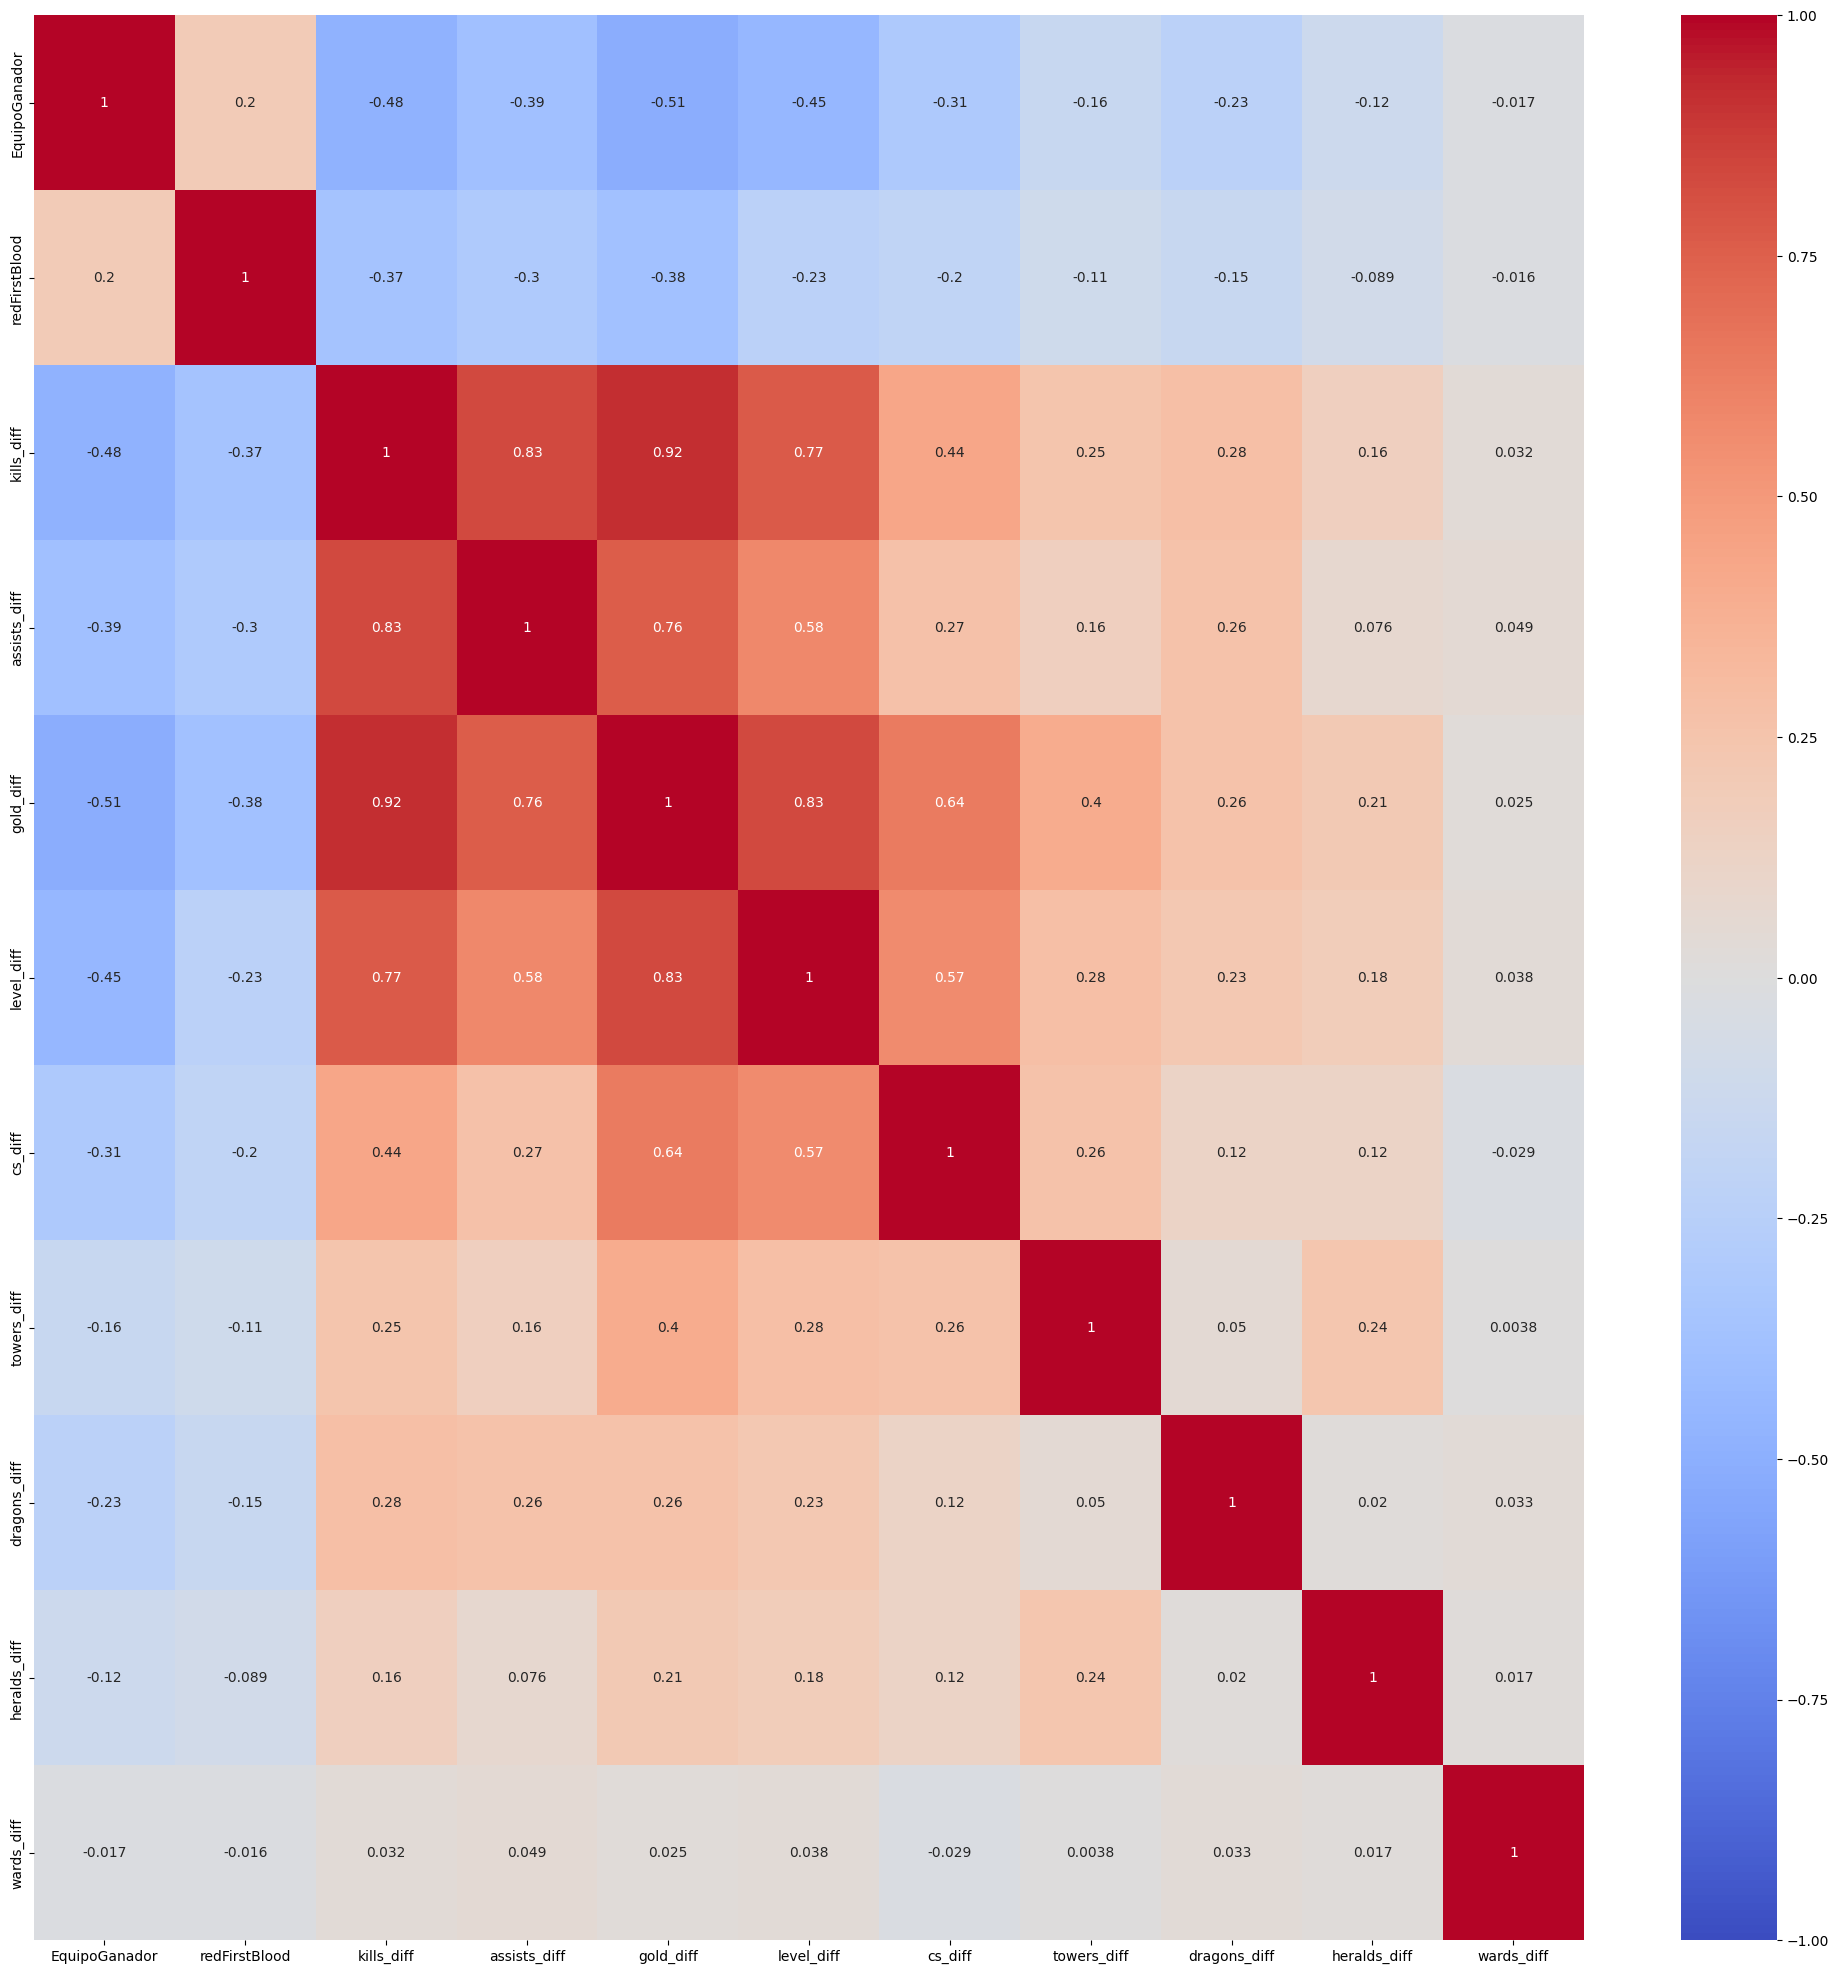

In [16]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')